# Fire up GraphLab Create

In [1]:
import graphlab

# Load some house sales data

In [2]:
sales=graphlab.SFrame('home_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to 1962788480@qq.com and will expire on April 16, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\tang\AppData\Local\Temp\graphlab_server_1493039035.log.0


In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


# Exploring some data

In [6]:
graphlab.canvas.set_target('ipynb')
sales.show(view='Scatter Plot',x='sqft_living',y='price')

# Create a simple regression model of sqrt_living to price

In [11]:
training_data,test_data=sales.random_split(0.8,seed=0)

## Build the regression model

In [12]:
sqft_model=graphlab.linear_regression.create(training_data,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16501

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.047059     | 4351320.699716     | 2051576.559487       | 263783.130906 | 246736.972031   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

# Evaluate the model

In [13]:
print test_data['price'].mean()

543054.042563


In [15]:
print sqft_model.evaluate(test_data)

{'max_error': 4144882.6025541015, 'rmse': 255181.05610436262}


# Let's show what the prediction looks like# plot on this page

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 

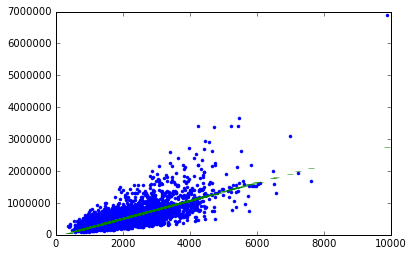

In [19]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'_')

In [21]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-46307.2410116,5059.74608559
sqft_living,None,281.741621684,2.22012484089


# Explore some other data features

In [22]:
sales.show(view='BoxWhisker Plot',x='zipcode',y='price')

# Build a model with more features

In [23]:
my_features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [24]:
my_features_model=graphlab.linear_regression.create(training_data,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16508

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.050003     | 3794456.167999     | 2447018.466036       | 180769.946797 | 206677.406583   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [25]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4144882.6025541015, 'rmse': 255181.05610436262}
{'max_error': 3472768.3668699684, 'rmse': 179517.1494405248}


# Apply learned model to predict prices of 3 houses

In [26]:
house=sales[sales['id']=='5309101200']

In [27]:
house

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [28]:
print house['price']

[620000L, ... ]


In [29]:
print sqft_model.predict(house)

[629872.6510306993]


In [30]:
print my_features_model.predict(house)

[723323.4210882843]


# Assignment

In [32]:
zip_sales=sales[sales['zipcode']=='98039']

In [33]:
print zip_sales['price'].mean()

2160606.6


In [36]:
filter_sales=sales[(sales['sqft_living']>2000 )&( sales['sqft_living']<4000)]

In [40]:
print float(filter_sales.num_rows())/sales.num_rows()

0.421551843798


In [41]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [42]:
advanced_model=graphlab.linear_regression.create(training_data,validation_set=None,target='price',features=advanced_features)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.059003     | 3469012.450686     | 154580.940736 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [43]:
print advanced_model.evaluate(test_data)

{'max_error': 3556849.413858208, 'rmse': 156831.1168021901}


In [44]:
print my_features_model.evaluate(test_data)

{'max_error': 3472768.3668699684, 'rmse': 179517.1494405248}


In [45]:
print my_features_model.evaluate(test_data)['rmse']-advanced_model.evaluate(test_data)['rmse']

22686.0326383
